In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Collection and Analysis

In [ ]:
df = pd.read_csv('Uber Request Data.csv')

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


It is observed that the request & drop timestamp are not in proper datetime format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#Data Cleaning

In [ ]:
sum(df.duplicated(subset = 'Request id')) == 0

True

In [ ]:
df.shape

(6745, 6)

In [ ]:
#Checking null values

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
df.isnull().values.sum()

6564

In [ ]:
pd.DataFrame(round((100*(df.isnull().sum()/len(df.index))), 2))

,0
Request id,0.00
Pickup point,0.00
Driver id,39.29
Status,0.00
Request timestamp,0.00
Drop timestamp,58.03


In [ ]:
pd.DataFrame(df.isnull().sum(axis=1))

,0
0,0
1,0
2,0
3,0
4,0
...,...
6740,2
6741,2
6742,2
6743,2


In [ ]:
#Converting Request Timestamp and Drop Timestamp columns to Datetime Objects

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [ ]:
df[['Request id', 'Request timestamp', 'Drop timestamp']].head()

,Request id,Request timestamp,Drop timestamp
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
df['Request timestamp'].max()

Timestamp('2016-12-07 23:54:00')

#Data Featuring

Extracting hours from Request Timestamp and Drop Timestamp thereby adding new columns of Request Hours and Drop Hours



In [ ]:
df['Request Hours'] = df['Request timestamp'].apply(lambda x:x.hour)
df['Drop Hours'] = df['Drop timestamp'].apply(lambda x:x.hour)

In [ ]:
df[['Request id', 'Request timestamp', 'Drop timestamp', 'Request Hours', 'Drop Hours']].head()

,Request id,Request timestamp,Drop timestamp,Request Hours,Drop Hours
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [ ]:
#Defining a function which can separate timeslots based on the provided labels
def determine_time_slot(x):
  if (x>=0 and x<8):
    return "Early Morning Hours"
  elif (x>=8 and x<12):
    return "Peak Morning Hours"
  elif (x>=12 and x<17):
    return "Noon Hours"
  elif (x>=17 and x<21):
    return "Evening Hours"
  elif (x>=21):
    return "Night Hours"

In [ ]:
df['Request Time Slot'] = df['Request Hours'].apply(determine_time_slot)
df[['Request id', 'Pickup point', 'Request Hours', 'Request Time Slot']].head()

,Request id,Pickup point,Request Hours,Request Time Slot
0,619,Airport,11,Peak Morning Hours
1,867,Airport,17,Evening Hours
2,1807,City,9,Peak Morning Hours
3,2532,Airport,21,Night Hours
4,3112,City,8,Peak Morning Hours


In [ ]:
df['Request Time Slot'].value_counts()

#it can be seen that maximum no. of requests were made in evening hours and early morning hours

Evening Hours          1893
Early Morning Hours    1827
Peak Morning Hours     1268
Night Hours             947
Noon Hours              810
Name: Request Time Slot, dtype: int64

Visualizations - Plotting and Observations

Text(0, 0.5, 'Count of Requests')

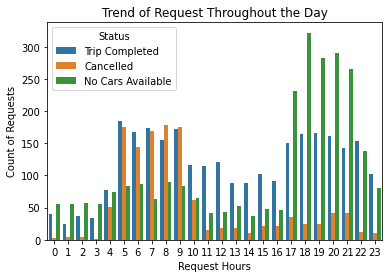

In [ ]:
#plotting request hours to see the trend of requests during different hours of the day

sns.countplot(x='Request Hours', hue='Status', data = df)
plt.title('Trend of Request Throughout the Day')
plt.ylabel('Count of Requests')

Text(0, 0.5, 'Trip Count')

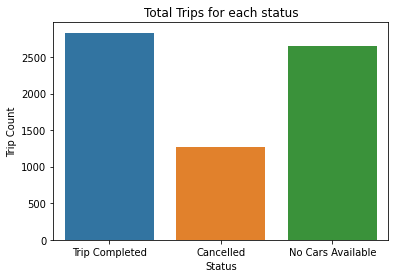

In [ ]:
#Plotting Status column for determining frequency of trips with cancelled, no cars available and trip completed status
sns.countplot(x="Status", data = df)
plt.title('Total Trips for each status')
plt.ylabel('Trip Count')

From the above count plot, it can be concluded that almost an equal number of request ends with the status of either **No Cars Available** or **Trips Completed**.

Text(0, 0.5, 'Airport/City Trip Count')

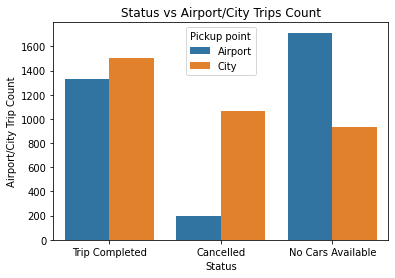

In [ ]:
#Determining the most problematic pickup point for all request status.

sns.countplot(x='Status', hue='Pickup point', data = df)
plt.title('Status vs Airport/City Trips Count')
plt.ylabel('Airport/City Trip Count')

Graph Visualisation of 'Airport/City Trips Count':



1.   **No Cars Available** - Beyond 1600 no. of trips where pickup point is 'Airpot', uber customers didn't get the car
2.   **Trip Completed** - Between 1400-1500 no. of trips completed where pickup point is 'City' and around 1300 trips were completed for airport pickup point
3.   **Cancelled** - Between 1000-1050 no. of trips were cancelled as well as where pickup point is city which is little than the trips completed for the same



Text(0.5, 0, 'Status Count')

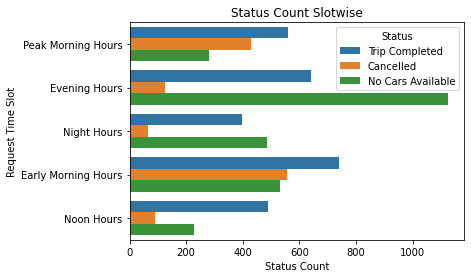

In [ ]:
#Determining the timeslot where maximum trips were completed/cancelled/no cars available

sns.countplot(y='Request Time Slot', hue='Status', data=df)
plt.title('Status Count Slotwise')
plt.xlabel('Status Count')

Key Points from the above plot :



1.   **Evening Hours (5pm-8pm)**: No. of requests beyond 1000 ended with no cars available
2.   **Early Morning Hours (1am-7am)**: No. of requests between 500-600 were cancelled and cars were not available. While approx 700-800 trips were completed
::


In [ ]:
#Analyzing plot for each trip status, creating individual dataframes

df_nocars = df[(df['Status'] == 'No Cars Available')]
df_tripcompl = df[(df['Status'] == 'Trip Completed')]
df_cancelled = df[(df['Status'] == 'Cancelled')]

Text(0.5, 0, 'Airport/City Count')

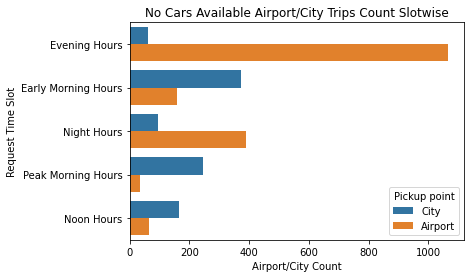

In [ ]:
#NOTE: Airpot and city pickup points counts for all time slots

sns.countplot(y='Request Time Slot', hue='Pickup point', data=df_nocars ,order = df_nocars['Request Time Slot'].value_counts().index)
plt.title('No Cars Available Airport/City Trips Count Slotwise')
plt.xlabel('Airport/City Count')

*   For aiport pickups during evening hours(5pm-8pm) maximum request ended up with no cars available (1100-1200)
*   For city pickups during early morning hours(1am-7am) maximum request ended up with no cars available(350-400)

In [ ]:
#Count of airport rides in evening hours where cars were not available
df_nocars_airport = df_nocars.loc[(df_nocars['Pickup point'] == 'Airport') & (df_nocars['Request Time Slot'] == 'Evening Hours')]
len(df_nocars_airport.index)

1067

In [ ]:
#Count of city rides in early morning hours where cars were not available
df_nocars_city = df_nocars.loc[(df_nocars['Pickup point'] == 'City') & (df_nocars['Request Time Slot'] == 'Early Morning Hours')]
len(df_nocars_city.index)

374

**Trips Completed**: Airport and City Pickup points counts for all time slots

Text(0.5, 0, 'Airport/City Count')

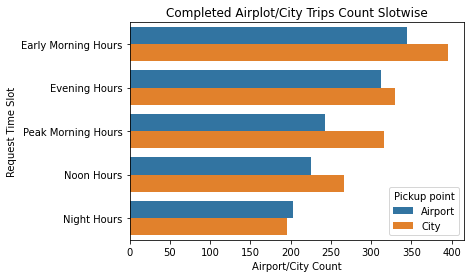

In [ ]:
sns.countplot(y='Request Time Slot', hue='Pickup point', data=df_tripcompl, order=df_tripcompl['Request Time Slot'].value_counts().index)
plt.title('Completed Airplot/City Trips Count Slotwise')
plt.xlabel('Airport/City Count')

In [ ]:
#Count of city rides in early morning hours where trips were completed
df_tripcompl_city = df_tripcompl.loc[(df_tripcompl['Pickup point'] == 'City') & (df_tripcompl['Request Time Slot'] == 'Early Morning Hours')]
len(df_tripcompl_city.index)

396

In [ ]:
#Count of airport rides in early morning hours where trips were completed
df_tripcompl_airport = df_tripcompl.loc[(df_tripcompl['Pickup point'] == 'Airport') & (df_tripcompl['Request Time Slot'] == 'Early Morning Hours')]
len(df_tripcompl_airport.index)

344

**Cancelled**: Airport and City Pickup points counts for all time slots

Text(0.5, 0, 'Airport/City Count')

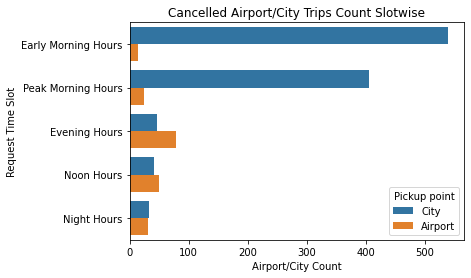

In [ ]:
sns.countplot(y='Request Time Slot', hue='Pickup point', data=df_cancelled, order=df_cancelled['Request Time Slot'].value_counts().index)
plt.title('Cancelled Airport/City Trips Count Slotwise')
plt.xlabel('Airport/City Count')



1.   For City pickups, maximum trips were cancelled in early morning hours
2.   For Airport pickups, maximum trips were cancelled in evening hours



In [ ]:
#Count of City rides in early morning hours where requests were cancelled by drivers
df_cancelled_city = df_cancelled.loc[(df_cancelled['Pickup point'] == 'City') & (df_cancelled['Request Time Slot'] == 'Early Morning Hours')]
len(df_cancelled_city.index)

540

In [ ]:
#Count of Airport rides in evening hours where requests were cancelled by drivers
df_cancelled_airport = df_cancelled.loc[(df_cancelled['Pickup point'] == 'Airport') & (df_cancelled['Request Time Slot'] == 'Evening Hours')]
len(df_cancelled_airport.index)

78

In [ ]:
#Total Requests for Each Trip Status
print('Total requests where cars were not available : ' + str(len(df_nocars.index)))
print('Total requests which were cancelled : ' + str(len(df_cancelled.index)))
print('Total requests which were completed : ' + str(len(df_tripcompl.index)))

Total requests where cars were not available : 2650
Total requests which were cancelled : 1264
Total requests which were completed : 2831


Calculating Demand Supply Metrics


*  **Total Demand :** Total Trips made by all three status
*   **Total Supply :** Total Number of Trips completed
*   **Gap :** Difference between total demand and supply

In [ ]:
demand = len(df_nocars.index) + len(df_cancelled.index) + len(df_tripcompl.index)
print('Total Demand : ' + str(demand))

Total Demand : 6745


In [ ]:
supply = len(df_tripcompl.index)
print('Total Supply : ' + str(supply))

Total Supply : 2831


In [ ]:
gap = demand - supply
print('Total Gap : ' + str(gap))

Total Gap : 3914


Text(0.5, 0, 'Demand Count')

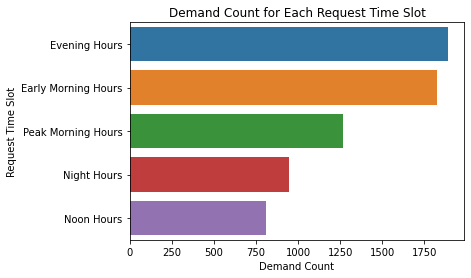

In [ ]:
#Plotting number of requests for each request time slot to see the demand across time slots
sns.countplot(y='Request Time Slot', data=df, order=df['Request Time Slot'].value_counts().index)
plt.title('Demand Count for Each Request Time Slot')
plt.xlabel('Demand Count')

Demand for all time slots.


*   0-8 (Early Morning Hours) : beyond 1800
*   8-12 (Peak Morning Hours) : approx 1250-1300
*   12-17 (Noon Hours) : approx 750-850
*   17-21 (Evening Hours) : approx 1800-2000
*   21-23 (Night Hours) : approx 700-750







In [ ]:
len(df.loc[(df['Request Time Slot'] == 'Evening Hours')].index)

1893

Thus, it can be concluded that maximum demand is during evening hours between 5PM-8PM

Text(0.5, 0, 'Supply Count')

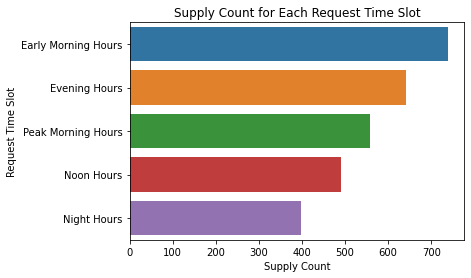

In [ ]:
#Plotting no. of requests for each time slot only when trip was completed

sns.countplot(y='Request Time Slot', data=df_tripcompl, order=df_tripcompl['Request Time Slot'].value_counts().index)
plt.title('Supply Count for Each Request Time Slot')
plt.xlabel('Supply Count')

Supply for all request time slots.


*   0-8 (Early Morning Hours) : approx 700-750
*   8-12 (Peak Morning Hours) : approx 500-550
*   12-17 (Noon Hours) : approx 450-500
*   17-21 (Evening Hours) : approx 600-650
*   21-23 (Night Hours) : approx 250-300

In [ ]:
len(df_tripcompl.loc[(df_tripcompl['Request Time Slot'] == 'Early Morning Hours')].index)

740

Thus, it is seen that maximum supply is in early morning hours

**Thereby, it can finally be concluded that there is an imbalance between demand & supply. Now, demand-supply metrics is calculated for both airport & city for all request time slot.**

In [ ]:
#Creating two separate for airport & city rides

df_airport_request = df.loc[df['Pickup point'] == 'Airport']
df_city_request = df.loc[df['Pickup point'] == 'City']

In [ ]:
def calculateDemandSupply(df, timeslot):
  demand = df[(df['Request Time Slot'] == timeslot)]['Request id'].count()
  supply = df[(df['Request Time Slot'] == timeslot) & (df['Status'] == 'Trip Completed')]['Request id'].count()
  gap = demand-supply

  return demand, supply, gap

In [ ]:
#Demand-supply metrics for Airport Rides for all time slots

demand_earlymorning_a, supply_earlymorning_a, gap_earlymorning_a = calculateDemandSupply(df_airport_request, 'Early Morning Hours')
demand_peakmorning_a, supply_peakmorning_a, gap_peakmorning_a = calculateDemandSupply(df_airport_request, 'Peak Morning Hours')
demand_noon_a, supply_noon_a, gap_noon_a = calculateDemandSupply(df_airport_request, 'Noon Hours')
demand_evening_a, supply_evening_a, gap_evening_a = calculateDemandSupply(df_airport_request, 'Evening Hours')
demand_night_a, supply_night_a, gap_night_a = calculateDemandSupply(df_airport_request, 'Night Hours')

In [ ]:
#Demand-supply metrics for City Rides for all time slots

demand_earlymorning_c, supply_earlymorning_c, gap_earlymorning_c = calculateDemandSupply(df_city_request, 'Early Morning Hours')
demand_peakmorning_c, supply_peakmorning_c, gap_peakmorning_c = calculateDemandSupply(df_city_request, 'Peak Morning Hours')
demand_noon_c, supply_noon_c, gap_noon_c = calculateDemandSupply(df_city_request, 'Noon Hours')
demand_evening_c, supply_evening_c, gap_evening_c = calculateDemandSupply(df_city_request, 'Evening Hours')
demand_night_c, supply_night_c, gap_night_c = calculateDemandSupply(df_city_request, 'Night Hours')

In [ ]:
#Calculating total demand and supply for all time slots

#Total Demand :
demand_earlymorning = demand_earlymorning_a + demand_earlymorning_c
demand_peakmorning = demand_peakmorning_a + demand_peakmorning_c
demand_noon = demand_noon_a + demand_noon_c
demand_evening = demand_evening_a + demand_evening_c
demand_night = demand_night_a + demand_night_c

#Total Supply :
supply_earlymorning = supply_earlymorning_a + supply_earlymorning_c
supply_peakmorning = supply_peakmorning_a + supply_peakmorning_c
supply_noon = supply_noon_a + supply_noon_c
supply_evening = supply_evening_a + supply_evening_c
supply_night = supply_night_a + supply_night_c

#Total Gap :
gap_earlymorning = gap_earlymorning_a + gap_earlymorning_c
gap_peakmorning = gap_peakmorning_a + gap_peakmorning_c
gap_noon = gap_noon_a + gap_noon_c
gap_evening = gap_evening_a + gap_evening_c
gap_night = gap_night_a + gap_night_c

**Plotting Count of Trip for all request time slots corresponding to Airport and City Pickup Points.**

Text(0, 0.5, 'Airport/City Request Count')

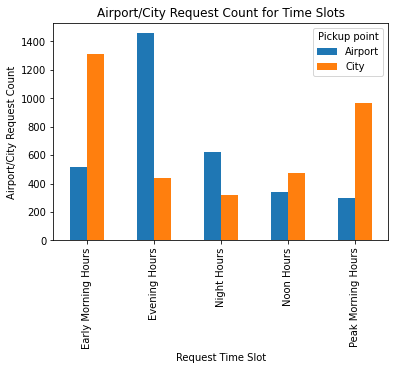

In [ ]:
df.groupby(['Request Time Slot', 'Pickup point']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Airport/City Request Count for Time Slots')
plt.ylabel('Airport/City Request Count')

**Conclusions:**

1.   Maximum trip requests for airport were made in evening hours
2.   Maximum trip requests for city were made in early morning hours



In [ ]:
gap_data = {
    'Request Time Slot' : ['Early Morning', 'Peak Morning', 'Noon', 'Evening', 'Night'],
    'Total Demand' : [demand_earlymorning, demand_peakmorning, demand_noon, demand_evening, demand_night],
    'Total Supply' : [supply_earlymorning, supply_peakmorning, supply_noon, supply_evening, supply_night],
    'Total Gap' : [gap_earlymorning, gap_peakmorning, gap_noon, gap_evening, gap_night],
    'Demand_From_Airport' : [demand_earlymorning_a, demand_peakmorning_a, demand_noon_a, demand_evening_a, demand_night_a],
    'Supply_To_Airport' : [supply_earlymorning_a, supply_peakmorning_a, supply_noon_a, supply_evening_a, supply_night_a],
    'Gap_From_Airport' : [gap_earlymorning_a, gap_peakmorning_a, gap_noon_a, gap_evening_a, gap_night_a],
    'Demand_From_City' : [demand_earlymorning_c, demand_peakmorning_c, demand_noon_c, demand_evening_c, demand_night_c],
    'Supply_To_City' : [supply_earlymorning_c, supply_peakmorning_c, supply_noon_c, supply_evening_c, supply_night_c],
    'Gap_From_City' : [gap_earlymorning_c, gap_peakmorning_c, gap_noon_c, gap_evening_c, gap_night_c]
}

In [ ]:
gap_df = pd.DataFrame(data=gap_data)

In [ ]:
gap_df

,Request Time Slot,Total Demand,Total Supply,Total Gap,Demand_From_Airport,Supply_To_Airport,Gap_From_Airport,Demand_From_City,Supply_To_City,Gap_From_City
0,Early Morning,1827,740,1087,517,344,173,1310,396,914
1,Peak Morning,1268,559,709,301,243,58,967,316,651
2,Noon,810,491,319,339,225,114,471,266,205
3,Evening,1893,642,1251,1457,312,1145,436,330,106
4,Night,947,399,548,624,203,421,323,196,127


In [ ]:
gap_df[['Request Time Slot', 'Total Demand', 'Total Supply', 'Gap_From_City']].sort_values('Gap_From_City', ascending = False)

,Request Time Slot,Total Demand,Total Supply,Gap_From_City
0,Early Morning,1827,740,914
1,Peak Morning,1268,559,651
2,Noon,810,491,205
4,Night,947,399,127
3,Evening,1893,642,106


Text(0.5, 6.79999999999999, 'Total Gap')

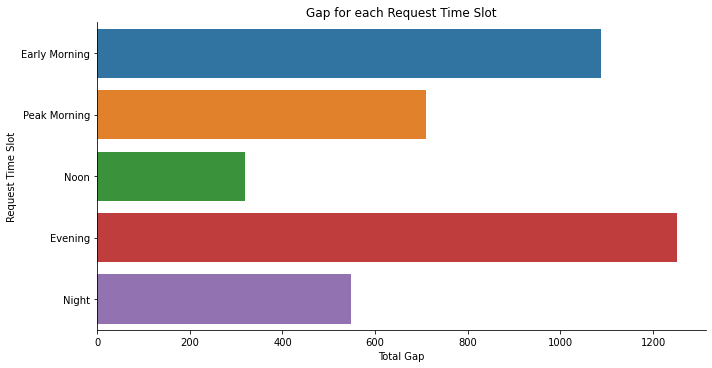

In [ ]:
#Plotting demand-supply gap for all request time slot
sns.catplot(x='Total Gap', y='Request Time Slot', kind='bar', data=gap_df, height=5, aspect=2)
plt.title('Gap for each Request Time Slot')
plt.xlabel('Total Gap')

*   Demand Supply Gap is maximum in evening hours
*   Demand Supply Gap is minimum in noon hours

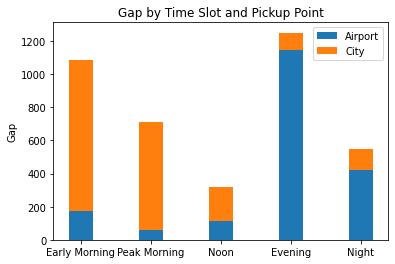

In [ ]:
#Visualizing Gap differentiated by pickup points and all time slots

labels = gap_df['Request Time Slot']
gap_airport = gap_df['Gap_From_Airport']
gap_city = gap_df['Gap_From_City']
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, gap_airport, width, label='Airport')
ax.bar(labels, gap_city, width, bottom=gap_airport, label='City')
ax.set_ylabel('Gap')
ax.set_title('Gap by Time Slot and Pickup Point')
ax.legend()

plt.show()

We can clearly see that gap is maximum for Airport rides in Evening hours & City rides in early morning hours

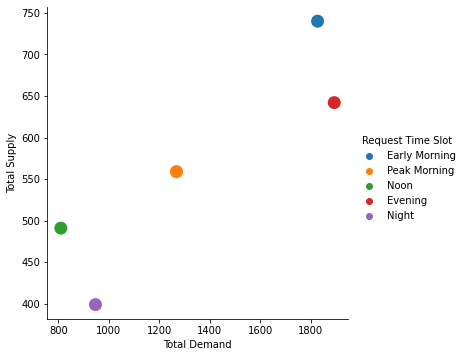

In [ ]:
#Plotting demand & supply for all time slots as calculated in gap_df dataframe

demandVsGap = sns.pairplot(gap_df, x_vars='Total Demand', y_vars='Total Supply', hue='Request Time Slot', plot_kws={'alpha': 1, 's' : 200}, height=5)


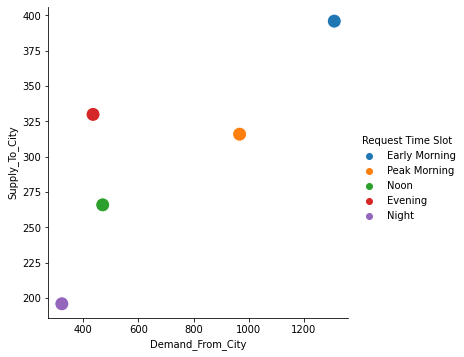

In [ ]:
#Plotting demand-supply for city to airport rides

cityVsGap = sns.pairplot(gap_df, x_vars='Demand_From_City', y_vars='Supply_To_City', hue='Request Time Slot', plot_kws={'alpha': 1, 's' : 200}, height=5)

Numbers calculated in gap_df for City Demand-Supply can be visualised in the above plot

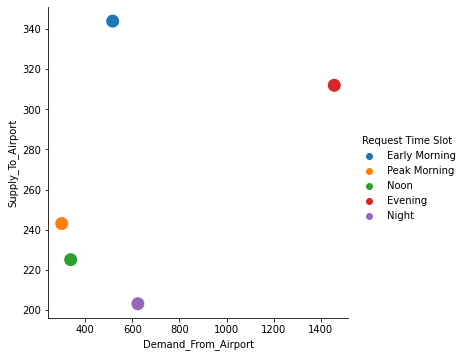

In [ ]:
#Plotting demand-supply for Airport to City Rides

airportVsGap = sns.pairplot(gap_df, x_vars='Demand_From_Airport', y_vars='Supply_To_Airport', hue='Request Time Slot', plot_kws={'alpha': 1, 's' : 200}, height=5)

Numbers calculated in gap_df for Airport Demand-Supply can be visualised in the above plot

In [ ]:
#Percentage wise distribution of rides for city and airport pickup points (Early morning hours and evening hours)

def pie_chart(dataframe):
  labels = dataframe.index.values
  sizes = dataframe['Status'].values

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow=True, startangle = 90)
  ax1.axis('equal')
  plt.show()

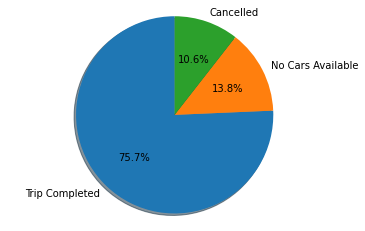

In [ ]:
#Distribution of trips as City during evening hours
df_city = df_city_request.loc[df_city_request['Request Time Slot'] == 'Evening Hours']
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

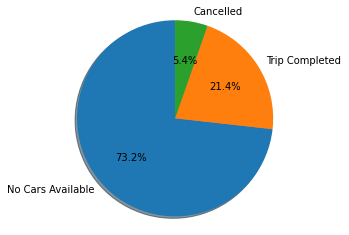

In [ ]:
#Distribution of trips as Airport during evening hours
df_airport = df_airport_request.loc[df_airport_request['Request Time Slot'] == 'Evening Hours']
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

In [ ]:
#Exporting final uber data set to csv
df.to_csv('Uber Data.csv')

In [ ]:
#Exporting gap uber data set to csv
gap_df.to_csv('Gap Data.csv')